In [1]:
!apt-get update -qq
!pip install torch torchvision torchio nibabel
!git clone https://github.com/mobaidoctor/med-ddpm.git
%cd med-ddpm


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 516.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
!mkdir -p data
!mkdir -p model

In [3]:
!git clone https://github.com/mobaidoctor/med-ddpm.git
%cd med-ddpm

Cloning into 'med-ddpm'...
remote: Enumerating objects: 223, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 223 (delta 15), reused 11 (delta 11), pack-reused 200 (from 1)
Receiving objects: 100% (223/223), 490.62 MiB | 36.33 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Updating files: 100% (110/110), done.
/content/med-ddpm/med-ddpm


In [4]:
!mkdir -p data
!wget -q https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/MedNIST.tar.gz
!tar -xzf MedNIST.tar.gz -C data


In [5]:
import os

print("Folders inside data/MedNIST:")
print(os.listdir('data/MedNIST'))


Folders inside data/MedNIST:
['BreastMRI', 'CXR', 'HeadCT', 'README.md', 'Hand', 'AbdomenCT', 'ChestCT']


In [6]:
import os

print("Folders in data/MedNIST:")
print(os.listdir('data/MedNIST'))

chest_path = 'data/MedNIST/ChestCT'
files = os.listdir(chest_path)
print(f"Sample files in {chest_path}:")
print(files[:5])


Folders in data/MedNIST:
['BreastMRI', 'CXR', 'HeadCT', 'README.md', 'Hand', 'AbdomenCT', 'ChestCT']
Sample files in data/MedNIST/ChestCT:
['003207.jpeg', '002864.jpeg', '000637.jpeg', '001188.jpeg', '009445.jpeg']


In [7]:
import os

chest_path = 'data/MedNIST/ChestCT'
files = os.listdir(chest_path)
print(f"Sample files in {chest_path}:")
print(files[:10])  # Show first 10 files


Sample files in data/MedNIST/ChestCT:
['003207.jpeg', '002864.jpeg', '000637.jpeg', '001188.jpeg', '009445.jpeg', '000757.jpeg', '000432.jpeg', '006680.jpeg', '006311.jpeg', '003749.jpeg']


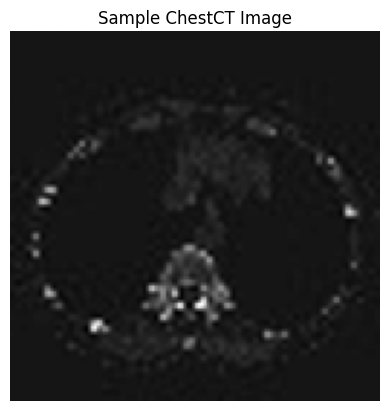

In [8]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np

def preprocess_image(path, size=(128,128)):
    img = Image.open(path).convert('L')  # grayscale
    img = img.resize(size)
    img = np.array(img).astype(np.float32) / 255.0  # normalize
    return img

# Load some image files
image_files = [os.path.join(chest_path, f) for f in os.listdir(chest_path) if f.endswith('.jpeg')]
image_files = image_files[:500]  # Limit for faster training

# Display a random sample
img_path = random.choice(image_files)
img_processed = preprocess_image(img_path)

plt.imshow(img_processed, cmap='gray')
plt.axis('off')
plt.title("Sample ChestCT Image")
plt.show()


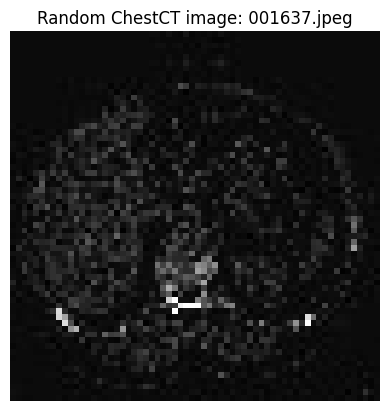

In [9]:
import os
import random
import imageio.v3 as iio
import matplotlib.pyplot as plt

chest_path = 'data/MedNIST/ChestCT'
image_files = [os.path.join(chest_path, f) for f in os.listdir(chest_path) if f.endswith('.jpeg')]

# Pick a random image
img_path = random.choice(image_files)
img = iio.imread(img_path)

plt.imshow(img, cmap='gray')
plt.title(f"Random ChestCT image: {os.path.basename(img_path)}")
plt.axis('off')
plt.show()


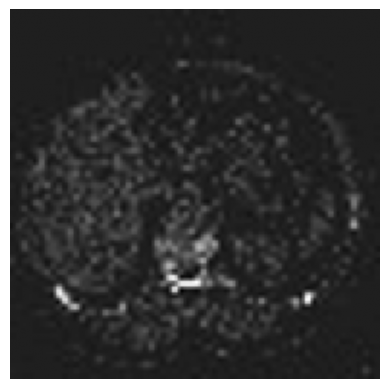

In [10]:
from PIL import Image
import numpy as np

def preprocess_image(path, size=(128,128)):
    img = Image.open(path).convert('L')  # grayscale
    img = img.resize(size)
    img = np.array(img).astype(np.float32) / 255.0  # normalize
    return img

# Example:
img_processed = preprocess_image(img_path)
plt.imshow(img_processed, cmap='gray')
plt.axis('off')
plt.show()


In [11]:
import torch
from torch.utils.data import Dataset, DataLoader

class MRIDataset(Dataset):
    def __init__(self, file_paths, transform=None):
        self.file_paths = file_paths
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = preprocess_image(self.file_paths[idx])
        if self.transform:
            img = self.transform(img)
        return torch.tensor(img).unsqueeze(0)  # Add channel dimension

dataset = MRIDataset(image_files)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class MRIDataset(Dataset):
    def __init__(self, file_paths):
        self.file_paths = file_paths

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img = preprocess_image(self.file_paths[idx])
        img = torch.tensor(img).unsqueeze(0)  # Add channel dimension
        return img

dataset = MRIDataset(image_files)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)


In [13]:
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, latent_dim=128):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 4, 2, 1),  # 64x64
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),  # 32x32
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),  # 16x16
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(128 * 16 * 16, latent_dim)
        self.fc_logvar = nn.Linear(128 * 16 * 16, latent_dim)

        # Decoder
        self.decoder_fc = nn.Linear(latent_dim, 128 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),  # 64x64
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 4, 2, 1),   # 128x128
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.decoder_fc(z)
        x = x.view(-1, 128, 16, 16)
        return self.decoder(x)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


Epoch [1/20] Loss: 113411519.38
Epoch [2/20] Loss: 113357240.58
Epoch [3/20] Loss: 113336737.72
Epoch [4/20] Loss: 113331767.58
Epoch [5/20] Loss: 113328656.94
Epoch [6/20] Loss: 113324683.27
Epoch [7/20] Loss: 113320171.69
Epoch [8/20] Loss: 113318261.20
Epoch [9/20] Loss: 113313756.16
Epoch [10/20] Loss: 113308965.50


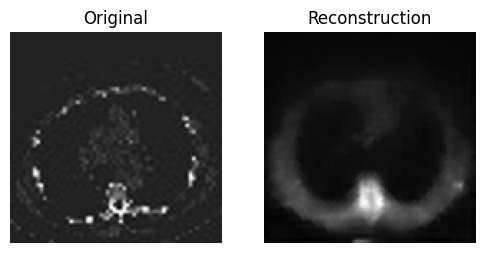

Epoch [11/20] Loss: 113303664.14
Epoch [12/20] Loss: 113299587.89
Epoch [13/20] Loss: 113293585.50
Epoch [14/20] Loss: 113288782.73
Epoch [15/20] Loss: 113285696.02
Epoch [16/20] Loss: 113282767.27
Epoch [17/20] Loss: 113280928.36
Epoch [18/20] Loss: 113278357.19
Epoch [19/20] Loss: 113275958.36
Epoch [20/20] Loss: 113273317.56


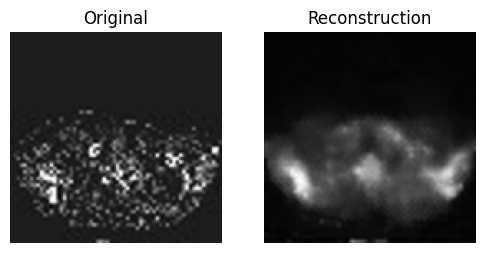

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(latent_dim=128).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

num_epochs = 20
model.train()

model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        batch = batch.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = model(batch)
        loss = loss_function(recon, batch, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {total_loss:.2f}")

    # Visualize reconstruction every 10 epochs
    if (epoch + 1) % 10 == 0:
        model.eval()
        with torch.no_grad():
            test_img = batch[0].unsqueeze(0)
            recon_img, _, _ = model(test_img)
            recon_np = recon_img.squeeze().cpu().numpy()
            orig_np = test_img.squeeze().cpu().numpy()

        fig, axs = plt.subplots(1, 2, figsize=(6, 3))
        axs[0].imshow(orig_np, cmap='gray')
        axs[0].set_title("Original")
        axs[0].axis('off')
        axs[1].imshow(recon_np, cmap='gray')
        axs[1].set_title("Reconstruction")
        axs[1].axis('off')
        plt.show()
        model.train()



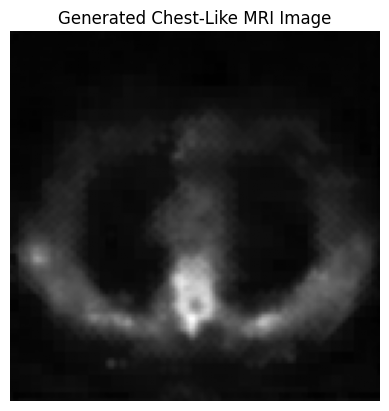

In [15]:
model.eval()
with torch.no_grad():
    z = torch.randn(1, 128).to(device)             # latent vector [1, latent_dim]
    x = model.decoder_fc(z)                        # decode fully connected layer: [1, 128*16*16]
    x = x.view(-1, 128, 16, 16)                    # reshape to match decoder conv input
    sample = model.decoder(x)                       # decode conv transpose layers
    sample = sample.squeeze().cpu().numpy()

plt.imshow(sample, cmap='gray')
plt.axis('off')
plt.title("Generated Chest-Like MRI Image")
plt.show()
